## Lead Scoring Case Study Assignment
#### Group Members: Jyotishmoi Phukan, Sakthi Sudarsan S
#### Batch: Upgrad DSC57 | Data Science - June 2023

In [1]:
# Let us import the important libraries for our assignment

# Regular python libraries for reading data and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Stats Model libraries
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Here we are setting the pandas view to display all columns without truncation
pd.set_option('display.max_columns', None)

## Reading the dataset

In [2]:
# Read the dataset and store it in a dataframe

lead_df = pd.read_csv("Leads.csv")
lead_df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [3]:
# Check the shape of the dataframe

lead_df.shape

(9240, 37)

In [4]:
# Describe the numerical columns of the dataframe
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Get the info of the dataset

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Cleaning

In [6]:
# Check for any missing or NaN values in the dataset

lead_df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Find out the percentage of missing values.

nan_columns = lead_df.columns[lead_df.isna().any()]
nan_sums = round((lead_df[nan_columns].isna().sum() / len(lead_df) * 100) , 4)
print("Percentage of NaN values in the dataset")
for column, nan_sum in nan_sums.items():
    print(column,":",nan_sum)

Percentage of NaN values in the dataset
Lead Source : 0.3896
TotalVisits : 1.4827
Page Views Per Visit : 1.4827
Last Activity : 1.1147
Country : 26.6342
Specialization : 15.5628
How did you hear about X Education : 23.8853
What is your current occupation : 29.1126
What matters most to you in choosing a course : 29.3182
Tags : 36.2879
Lead Quality : 51.5909
Lead Profile : 29.3182
City : 15.368
Asymmetrique Activity Index : 45.6494
Asymmetrique Profile Index : 45.6494
Asymmetrique Activity Score : 45.6494
Asymmetrique Profile Score : 45.6494


In [8]:
# Here we are going to drop some unnecessary columns from the dataset.
# Dropping unnecessary columns would include columns with high missing values and columns which are not relavant for the analysis.
# We will drop columns containing more than 30% of missing values.

columns_to_drop = ['Tags', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
                   'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

new_lead_df = lead_df.drop(columns=columns_to_drop)

In [9]:
# Our dataset contains around 9000 data points. We have dropped columns containing more tthan 30 % of missing values.
# Now let us check for the changes

new_lead_df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Now let us check if we can further clean our data
# Let us check for any possible outliers or skewness in our data
# We can observe that "Country" and "City" columns have a significant nummber of missing values.
# Let's see if they have any impact on the lead score
# First find the value counts for each column

col_list1 = ['Country', 'City']
for counts in col_list1:
    print("Value counts for", counts)
    print(new_lead_df[counts].value_counts(dropna=False))
    print()

Value counts for Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia           

In [11]:
# Here we can observe that these two variables are highly skewed like for Country variable - India has the highest 
# number of leads and for City variable - Mumbai has the highest number of leads.
# So we are dropping these two columns

new_lead_df.drop(['Country'], axis=1, inplace=True)
new_lead_df.drop(['City'], axis=1, inplace=True)

# Check for changes
new_lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Visualization

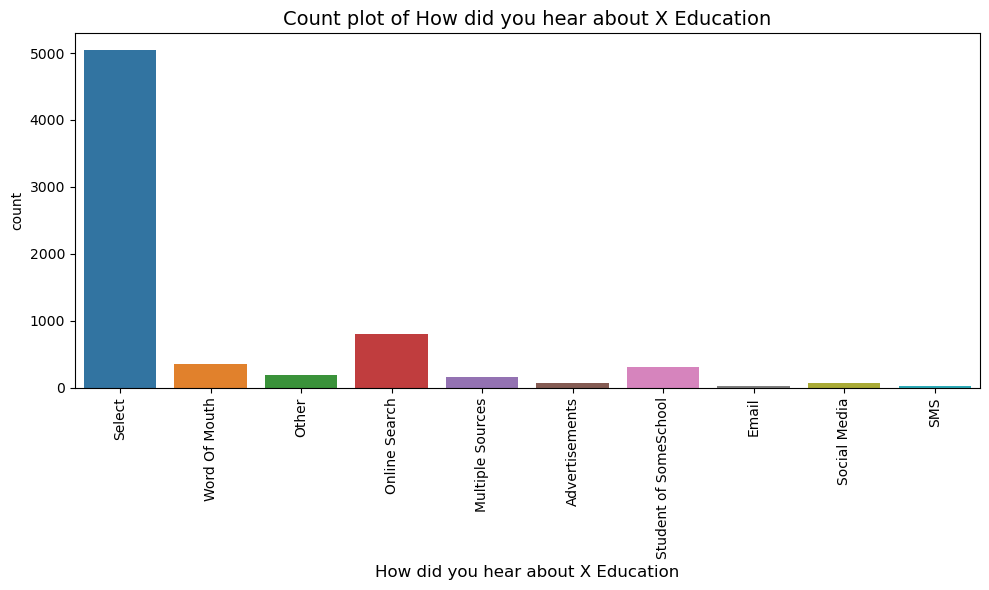

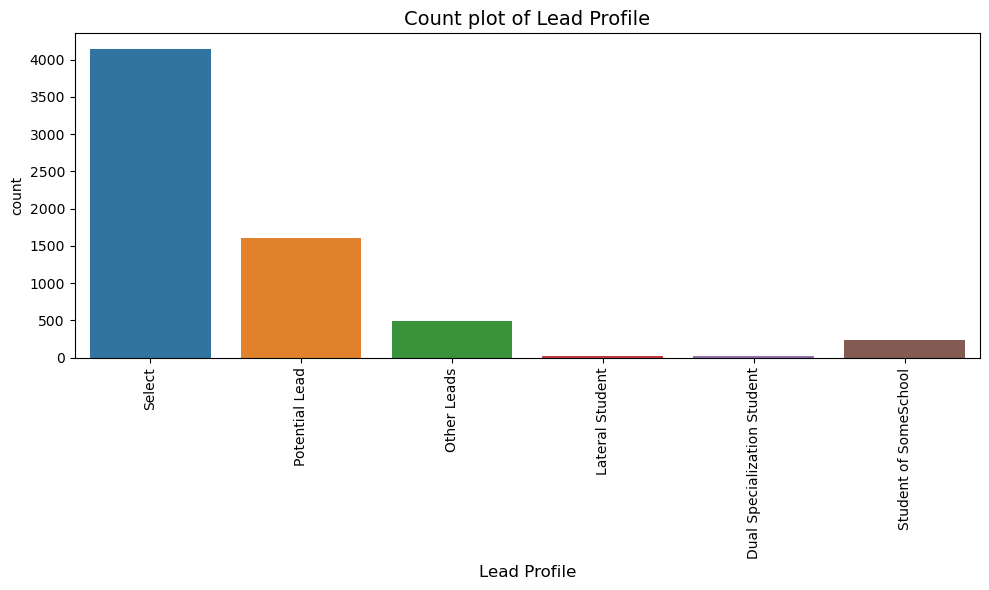

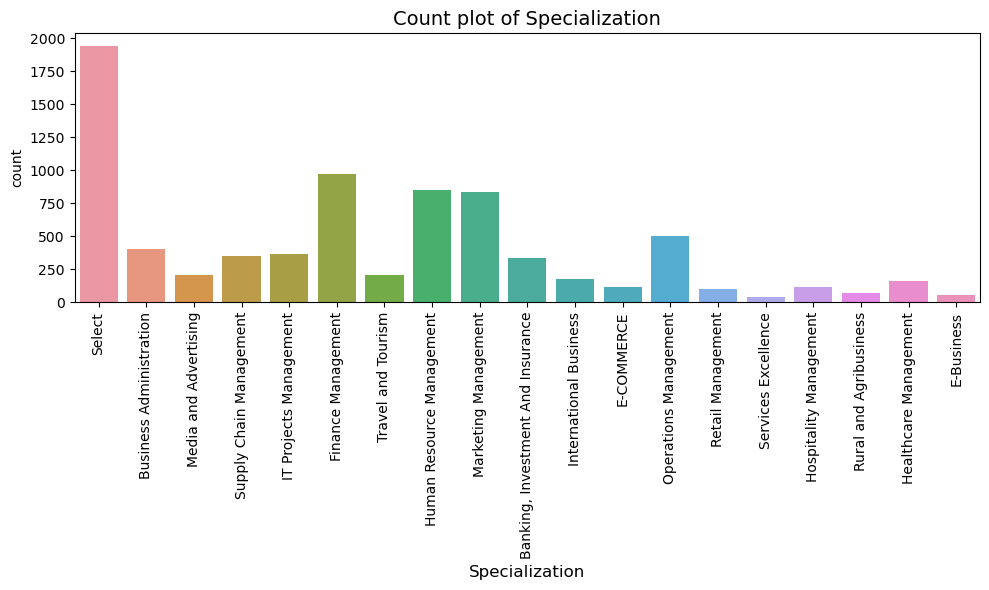

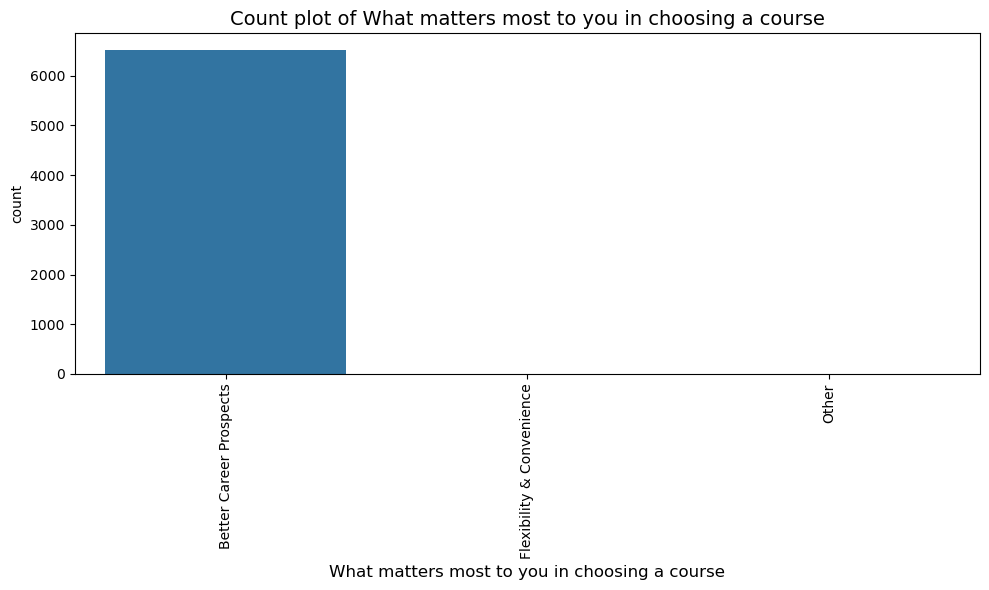

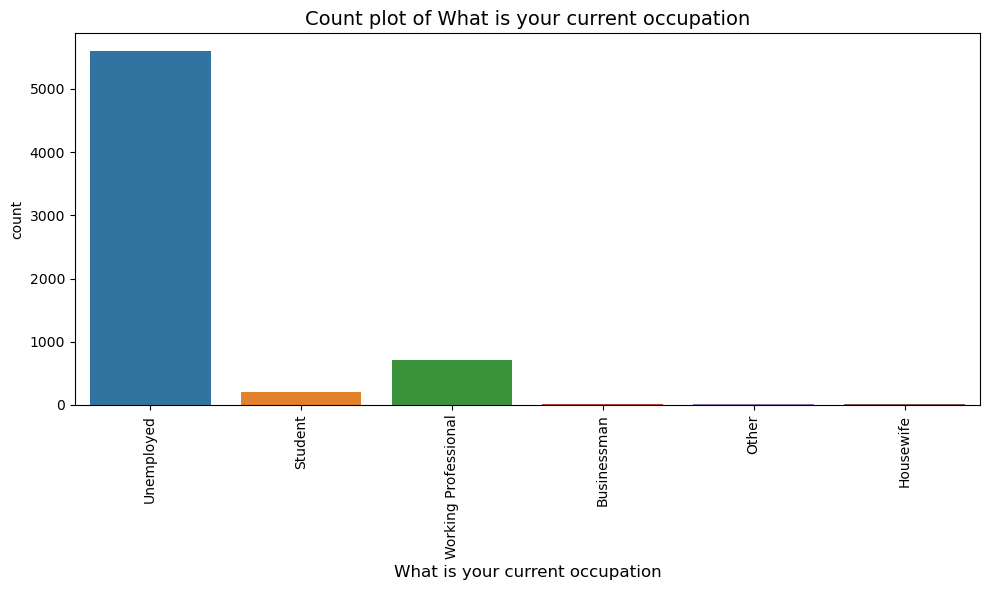

In [12]:
# Now let us perform some Exploratory Data Analysis to visualize our data and draw some meaningful insights
# Here I have selected a few columns to display in the form of countplot

plot_list = ['How did you hear about X Education', 'Lead Profile', 'Specialization', 
            'What matters most to you in choosing a course', 'What is your current occupation']

for plots in plot_list:
    plt.figure(figsize=[10,6])
    sns.countplot(data=new_lead_df, x=plots)
    plt.title("Count plot of "+plots, fontsize=14)
    plt.xlabel(plots, fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In the above plots we can observe that there a few variables which have "Select" as category which means that the student have not selected any option from that column which is by default set as "Select". The count of "Select" can be compared to missing values only.

In [13]:
# Let us check the value counts of that particular columns having "Select" catergory

select_list1 = ['How did you hear about X Education', 'Lead Profile', 'Specialization']
for counts in select_list1:
    print("Value counts for", counts)
    print(new_lead_df[counts].value_counts(dropna=False))
    print()

Value counts for How did you hear about X Education
Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

Value counts for Lead Profile
Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

Value counts for Specialization
Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Oper

In [14]:
# From the above we can see that "How did you hear about X Education" and "Lead Profile" have high number of "Select"
# category, so we can drop these two columns.

new_lead_df.drop(['How did you hear about X Education', 'Lead Profile'], axis=1, inplace=True)

# Check for changes
new_lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [15]:
# Let us check for the value counts of other columns too if we can further remove some redundant columns.
# First get the list of columns
new_lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [16]:
# Check for value counts

column_list1 = ['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']
for counts in column_list1:
    print("Value counts for", counts)
    print(new_lead_df[counts].value_counts())
    print()

Value counts for Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64

Value counts for Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64

Value counts for Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Value counts for Lead Source
Goo

So here we can observe that there are few columns which have only one value in majority compared to other values in the column. These columns are - 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'. Example like - In 'Do Not Call' there are 9238 No against 2 Yes. Practically all of these values are indicating towards - No, so it will be best to drop all these columns.

In [17]:
# Now drop the redundant columns
new_lead_df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
                  'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
                  'Update me on Supply Chain Content', 'Get updates on DM Content', 
                  'I agree to pay the amount through cheque'], axis=1, inplace=True)

# Check for changes
new_lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [18]:
new_lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,No,Modified


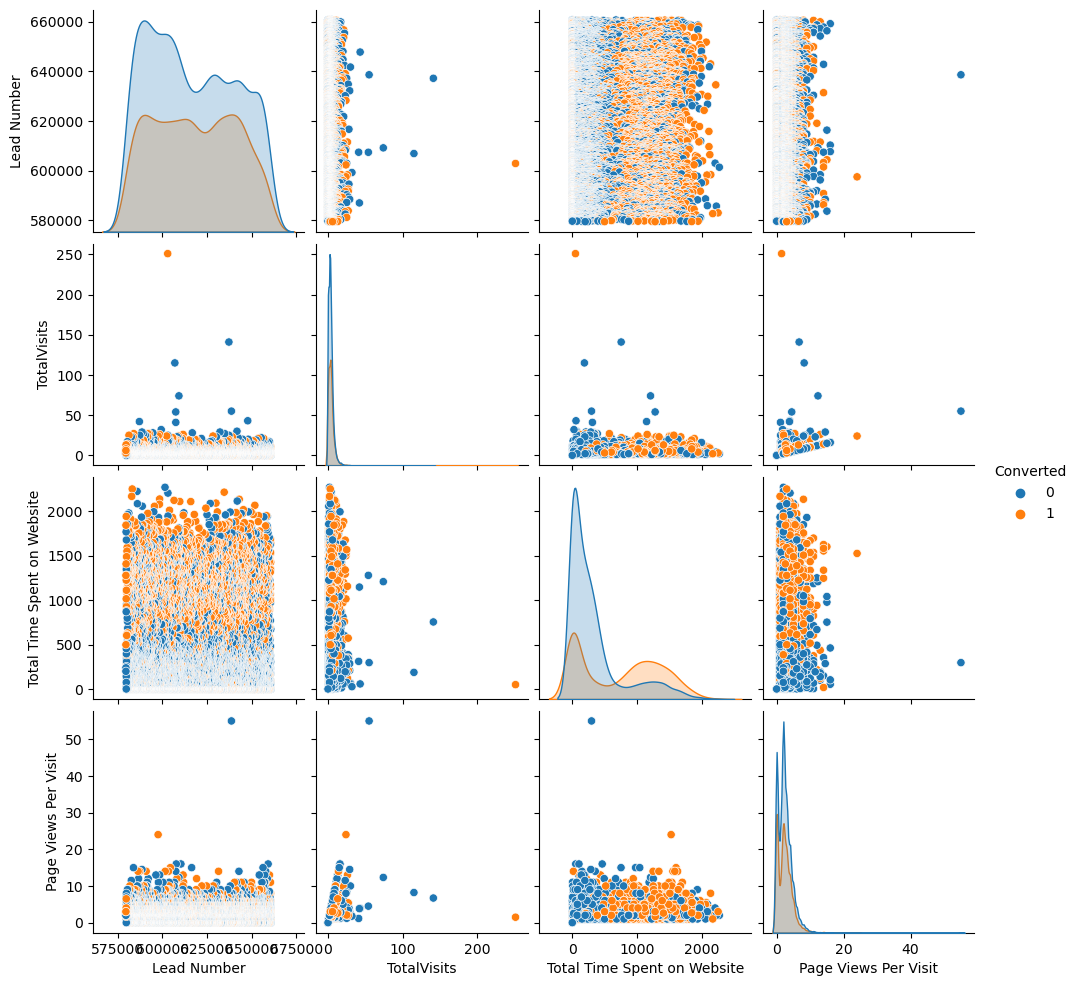

In [19]:
# Now let us plot all the numerical columns in the form of pairplot

sns.pairplot(data=new_lead_df, vars=['Lead Number', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], 
            diag_kind='kde', hue='Converted')
plt.show()

In [20]:
# Now check if any column is left out with high data points
# We can observe that the variable 'What matters most to you in choosing a course' donot have a uniform distribution

new_lead_df['What matters most to you in choosing a course'].value_counts()


Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [21]:
# Here we can see that count of 'Better Career Prospects' is 6528 against 'Flexibility & Convenience' - 2 and Other - 1.
# So we can drop this column

new_lead_df.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)

# Check for changes
new_lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [22]:
# Now let us again check the number of null values in our dataset

new_lead_df.isna().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [23]:
# Here we can observe that "What is your current occupation" have high number of null values.
# But we are not going to drop it because we have already dropped many other redundant columns previously.
# Now this column might have some signifance over the analysis.
# For now we will simply drop the rows with null values here

# Shape of the dataframe before dropping rows
new_lead_df.shape

(9240, 14)

In [24]:
new_lead_df = new_lead_df[~pd.isnull(new_lead_df["What is your current occupation"])]

# Shape after dropping
new_lead_df.shape

(6550, 14)

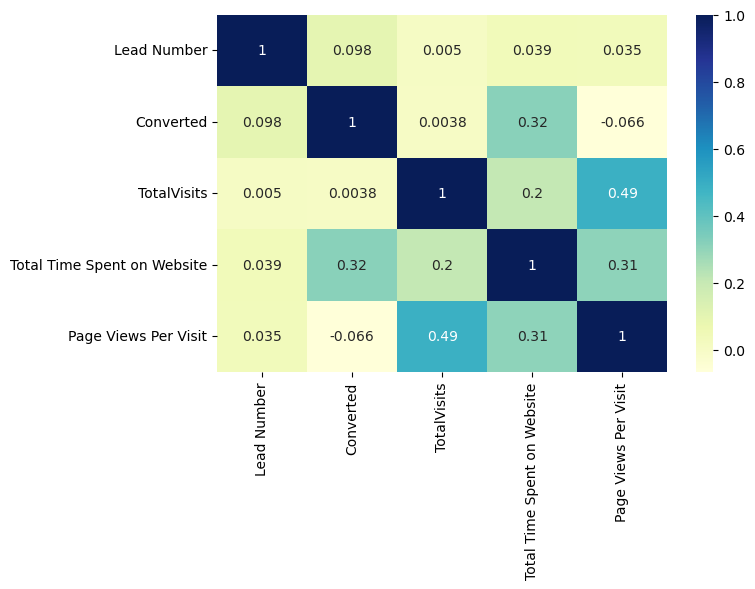

In [25]:
# Now check the correlation between the numerical variables in the form of heatmap

num_list = ['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
num_data = new_lead_df[num_list].corr()
plt.figure(figsize=[8,6])
sns.heatmap(num_data, cmap='YlGnBu', annot=True)
plt.tight_layout()
plt.show()

In [26]:
# Now let us analyze some of the categorical columns based on the target variable - "Converted".
# Here the value 1 means that the lead was converted and 0 means that it wasn't converted.

# Here we are going to represent the categorical variables in the form of countplots
# First make a list of the categorical variables.

new_lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

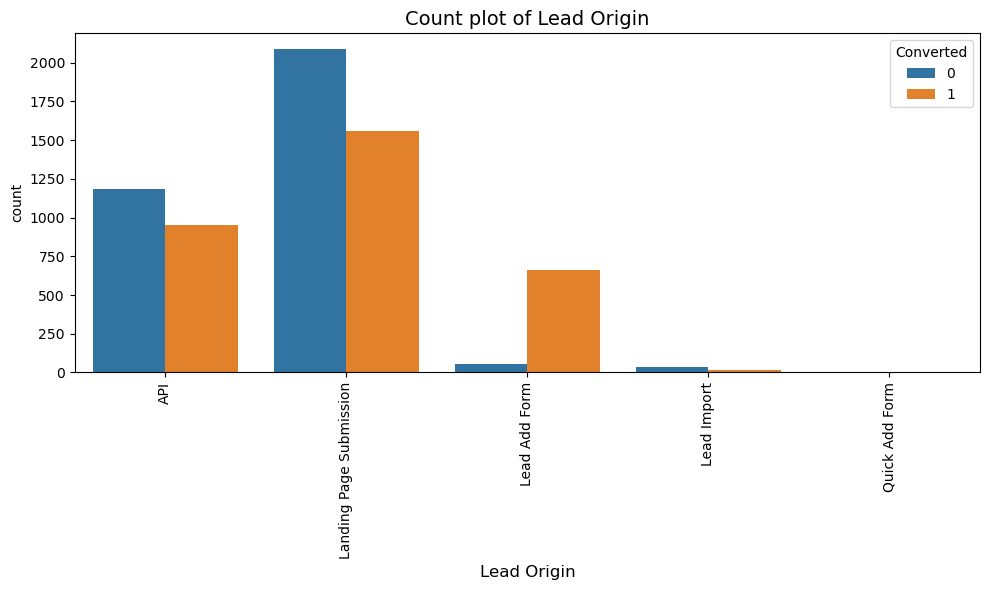

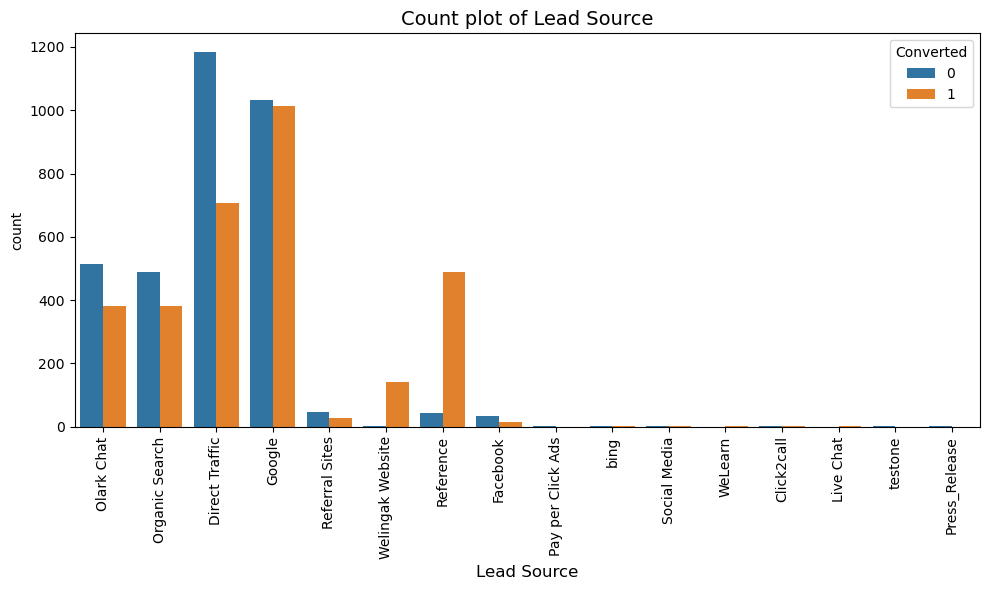

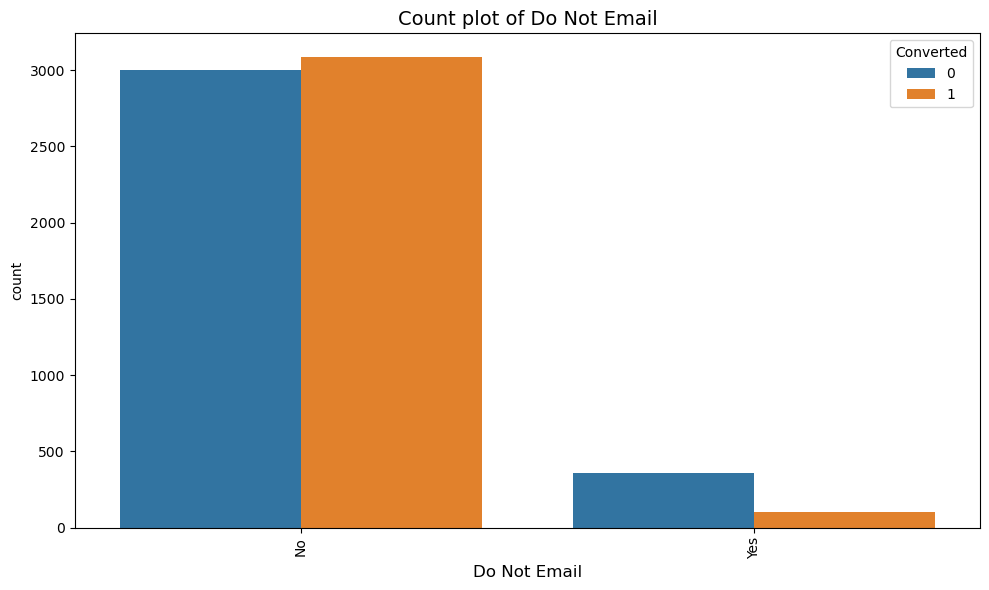

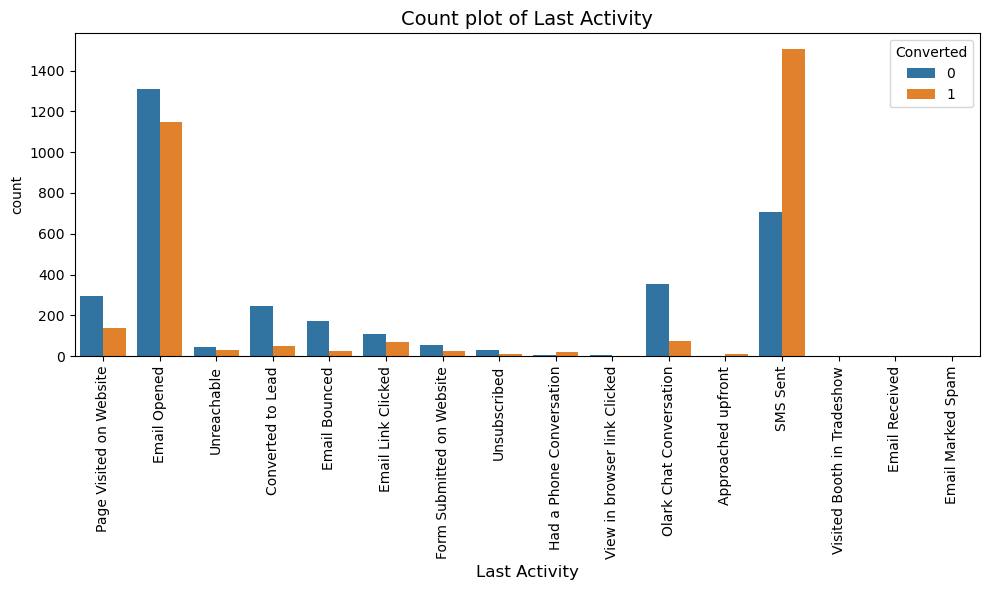

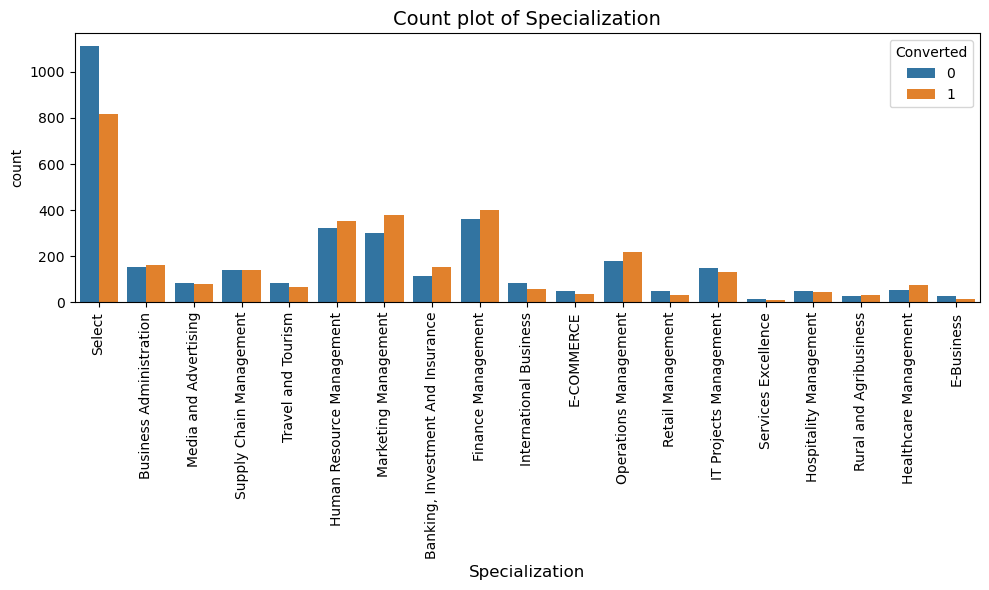

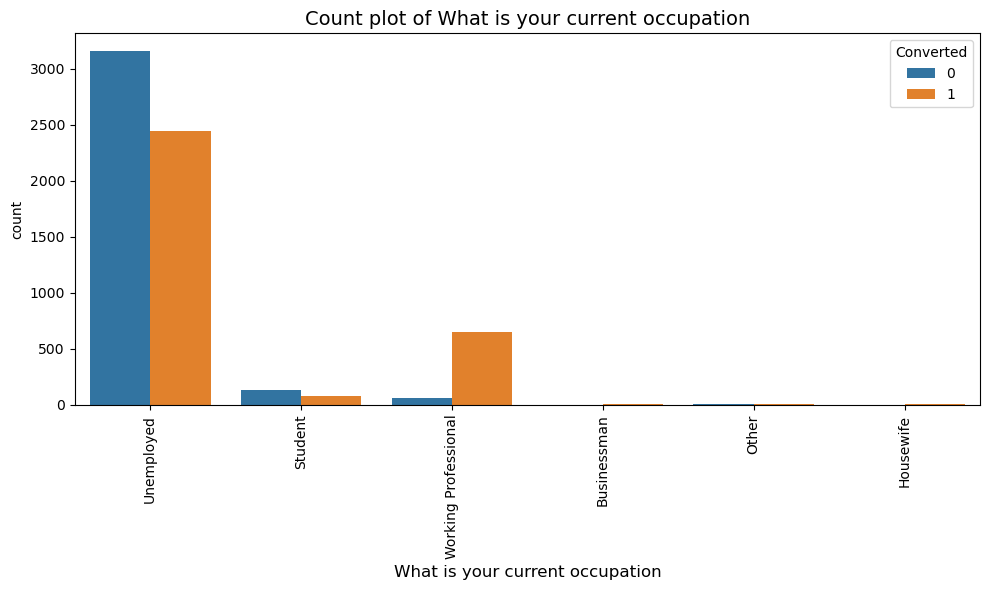

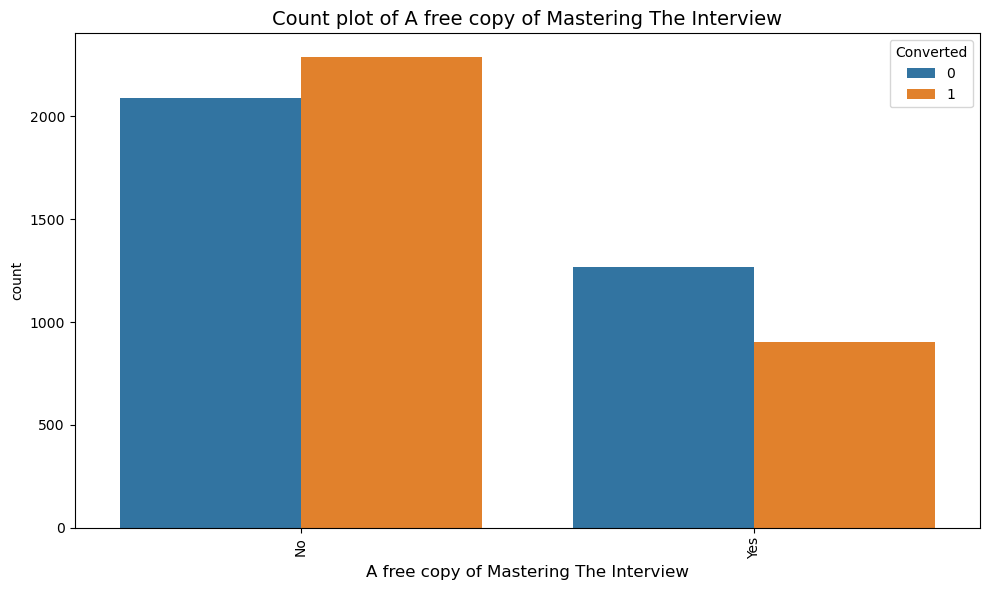

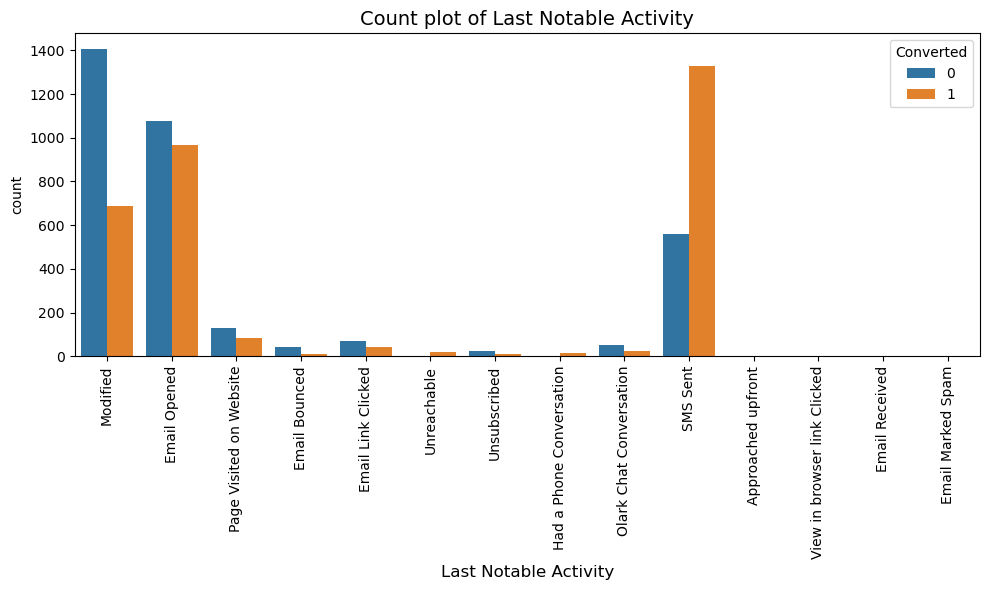

In [27]:
cat_list = ['Lead Origin', 'Lead Source',
       'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

for plots in cat_list:
    plt.figure(figsize=[10,6])
    sns.countplot(data=new_lead_df, x=plots, hue=new_lead_df.Converted)
    plt.title("Count plot of "+plots, fontsize=14)
    plt.xlabel(plots, fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [28]:
# Now let us again check for the null values in the dataset and try to clean if possible
# We are doing this because we want to make our data null free for regression model later on.

# Checking for null values

new_lead_df.isna().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [29]:
# So here we can see that the number of null values are less so we can simply drop the rows with null values.

new_lead_df = new_lead_df[~pd.isnull(new_lead_df["TotalVisits"])]

In [30]:
# Now again check for the null values

new_lead_df.isna().sum().sort_values(ascending=False)

Lead Source                               29
Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [31]:
# Now drop the null rows of the column "Lead Source".

new_lead_df = new_lead_df[~pd.isnull(new_lead_df["Lead Source"])]

In [32]:
# Now again check for the null values

new_lead_df.isna().sum().sort_values(ascending=False)

Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [33]:
# Now drop the null rows of the column "Specialization".

new_lead_df = new_lead_df[~pd.isnull(new_lead_df["Specialization"])]

In [34]:
# Now again check for the null values

new_lead_df.isna().sum().sort_values(ascending=False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [35]:
# So now we can observe that our data is perfectly clean with no null values
# Let us check the head

new_lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [36]:
new_lead_df.shape

(6373, 14)

In [37]:
# Here in the dataset we can observe that the columns "Prospect ID" and "Lead Number" are not significant in the analysis
# So we can drop these two columns

new_lead_df.drop(["Prospect ID", "Lead Number"], axis=1, inplace=True)

# Check for the changes

new_lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


## Dummy Data Preparation

Dummy variables are used in regression models to represent categorical data with two or more categories
as numerical values that can be used as independent variables in the model. They are essential because
many regression techniques, such as linear regression, require numerical inputs, and they assume that the
relationship between the independent variables and the dependent variable is linear. Dummy variables allow
us to include categorical data in the model without violating these assumptions.

In [38]:
# Now let us check which columns are actually categorical in nature
# Object type columns are usually categorical
# However we will pick those columns which are relevant in the analysis

new_lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

In [39]:
# Create dummy variables for the categorical columns

df_leadorigin = pd.get_dummies(new_lead_df["Lead Origin"], prefix='Lead_Origin', drop_first=True)
df_leadsource = pd.get_dummies(new_lead_df["Lead Source"], prefix='Lead_Source', drop_first=True)
df_donotemail = pd.get_dummies(new_lead_df["Do Not Email"], prefix='Do_Not_Email', drop_first=True)
df_lastactivity = pd.get_dummies(new_lead_df["Last Activity"], prefix='Last_Activity', drop_first=True)
df_occupation = pd.get_dummies(new_lead_df["What is your current occupation"], prefix='Occupation', drop_first=True)
df_interview = pd.get_dummies(new_lead_df["A free copy of Mastering The Interview"], prefix='Interview', drop_first=True)
df_notable = pd.get_dummies(new_lead_df["Last Notable Activity"], prefix='Last_Notable_Activity', drop_first=True)

In [40]:
# This is the original dataframe head before dummy creation
new_lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [41]:
# Merge the original dataframe with the dummy variable dataset.

new_lead_df = pd.concat([new_lead_df, df_leadorigin, df_leadsource, df_donotemail, df_lastactivity, df_occupation, 
                        df_interview, df_notable], axis=1)

In [42]:
# One thing to notice here is that we kept the variable - "Specialization" separately for dummy creation because
# it have the level - 'Select' which is of no use in our analysis and we are going to drop it explicitly

df_specialization = pd.get_dummies(new_lead_df["Specialization"], prefix='Specialization')

# Drop the 'Select' column
dummies_without_select = df_specialization.drop('Specialization_Select', axis=1)

# Concatenate the dummy variables without 'Select' back to the original DataFrame
new_lead_df = pd.concat([new_lead_df, dummies_without_select], axis=1)

In [43]:
# Now check for the changes

new_lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_testone,Do_Not_Email_Yes,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Interview_Yes,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
# Drop the unnecessary columns against which the dummy variables are created

new_lead_df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation',
                 'A free copy of Mastering The Interview', 'Last Notable Activity', 
                  'Specialization'], axis=1, inplace=True)

In [45]:
# Check for the changes after dropping

new_lead_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_testone,Do_Not_Email_Yes,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Interview_Yes,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [46]:
# Now we are going to split the data into train and test sets
# First define X and y
# We are dropping "Converted" in X because here all variables are independent excluding dependent "Converted" variable

X = new_lead_df.drop(["Converted"], axis=1)    
y = new_lead_df["Converted"]

In [47]:
# Check X head
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_testone,Do_Not_Email_Yes,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Interview_Yes,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
# Check y head
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [49]:
# Perform train_test_split
# Here we are going to split the data into 70:30 ratio where 70% of data will be used for training and 30% for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [50]:
# Print the shape of training data
X_train.shape

(4461, 74)

In [51]:
# Print the shape of test data
y_test.shape

(1912,)

## Rescaling the Features

In [52]:
# We are going to use MinMaxScaler for rescaling the features

scaler = MinMaxScaler()

In [53]:
# Check the head of the train data before scaling

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_testone,Do_Not_Email_Yes,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Interview_Yes,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,4.0,67,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,4.0,187,4.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,6.0,78,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
# Create a list of numeric variables and apply scaler to it

num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

# Check for changes after scaling
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_testone,Do_Not_Email_Yes,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Interview_Yes,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
# Describe the scaled train dataset

X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_testone,Do_Not_Email_Yes,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Interview_Yes,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
count,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.0,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.0,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.0,4461.000000,4461.0,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000
mean,0.014528,0.234426,0.153604,0.564672,0.094149,0.003587,0.290069,0.003587,0.320108,0.000448,0.139206,0.140776,0.000224,0.000224,0.071733,0.011208,0.0,0.000224,0.021296,0.000448,0.000224,0.068370,0.048644,0.027348,0.030038,0.0,0.387357,0.000224,0.012553,0.003811,0.062542,0.069491,0.338937,0.010536,0.006725,0.000897,0.000224,0.001793,0.002690,0.028917,0.862139,0.103340,0.337368,0.007397,0.019727,0.0,0.322349,0.0,0.002242,0.305089,0.011432,0.033849,0.288725,0.003587,0.005380,0.000224,0.040574,0.052230,0.007846,0.013226,0.116342,0.019727,0.012553,0.106254,0.044385,0.023089,0.104237,0.023313,0.058507,0.014571,0.008742,0.002690,0.040126,0.022192
std,0.021712,0.248618,0.127910,0.495856,0.292069,0.059788,0.453845,0.059788,0.466570,0.021171,0.346201,0.347829,0.014972,0.014972,0.258074,0.105286,0.0,0.014972,0.1443

## Training the Model

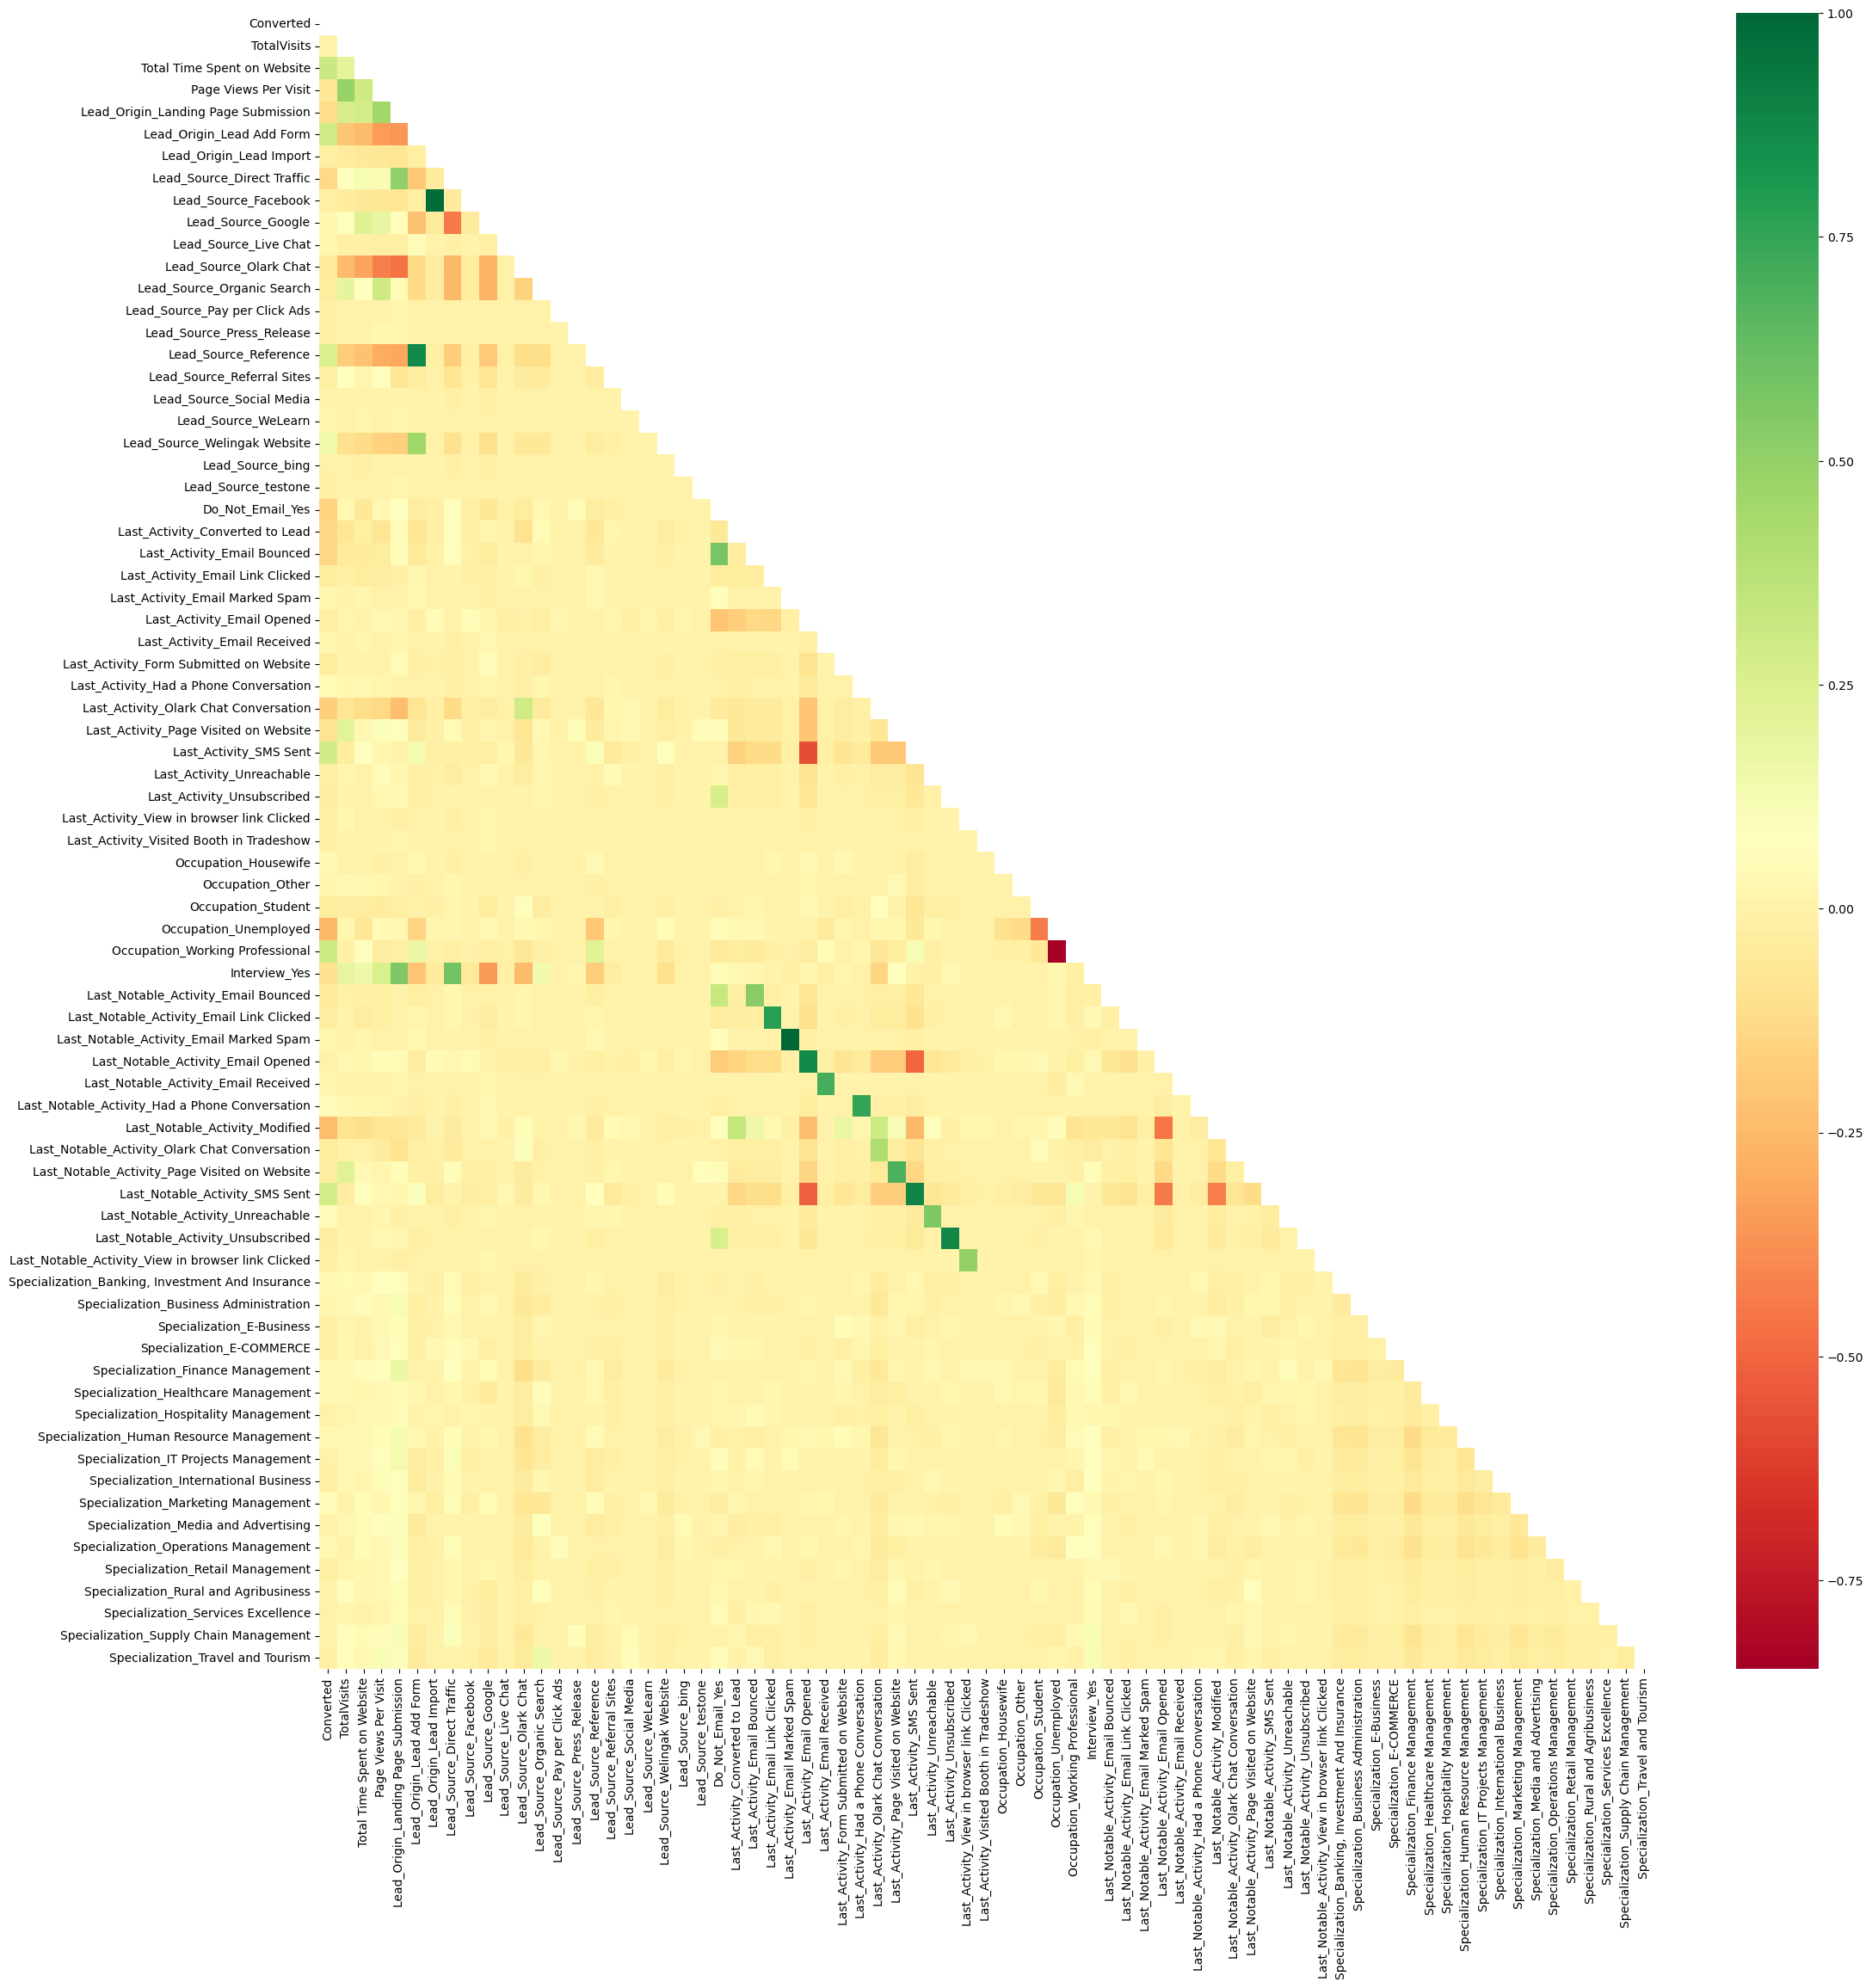

In [56]:
# Let us first create a heatmap to check the correlation coefficient

plt.figure(figsize=[25,25])
matrix = np.triu(new_lead_df.corr())
sns.heatmap(new_lead_df.corr(), annot=False, cmap='RdYlGn', mask=matrix)
plt.show()

In [57]:
# In the above heatmap we can observe that there are lot of variables which we cannot interpret easily with this approach
# So the best way to deal with this situation is to select a small set of features from these variables using RFE
# RFE stands for Recursive Feature Elimination

# Create an instance for logistic regression model
log_regm = LogisticRegression()

# Specify the number of features you want to select
num_features_to_select = 15
rfe = RFE(estimator=log_regm, n_features_to_select=num_features_to_select)
rfe = rfe.fit(X_train, y_train)

In [58]:
# Now we will "rfe.support_" and "rfe.ranking_" to get the list of top 15 variables.
# rfe.support_ will be a boolean mask indicating which features have been selected (True) and which have been eliminated (False). 
# rfe.ranking_ will provide the ranking of all features based on their importance.

list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead_Origin_Landing Page Submission', False, 8),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 52),
 ('Lead_Source_Direct Traffic', False, 24),
 ('Lead_Source_Facebook', False, 51),
 ('Lead_Source_Google', False, 36),
 ('Lead_Source_Live Chat', False, 44),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 35),
 ('Lead_Source_Pay per Click Ads', False, 43),
 ('Lead_Source_Press_Release', False, 53),
 ('Lead_Source_Reference', True, 1),
 ('Lead_Source_Referral Sites', False, 37),
 ('Lead_Source_Social Media', False, 58),
 ('Lead_Source_WeLearn', False, 42),
 ('Lead_Source_Welingak Website', True, 1),
 ('Lead_Source_bing', False, 33),
 ('Lead_Source_testone', False, 38),
 ('Do_Not_Email_Yes', True, 1),
 ('Last_Activity_Converted to Lead', False, 25),
 ('Last_Activity_Email Bounced', False, 4),
 ('Last_Activity_Email Link C

In [59]:
# Checking the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead_Origin_Lead Add Form', 'Lead_Source_Olark Chat',
       'Lead_Source_Reference', 'Lead_Source_Welingak Website',
       'Do_Not_Email_Yes', 'Last_Activity_Had a Phone Conversation',
       'Last_Activity_SMS Sent', 'Occupation_Housewife', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional',
       'Last_Notable_Activity_Had a Phone Conversation',
       'Last_Notable_Activity_Unreachable'],
      dtype='object')


In [60]:
# Check the columns that are rejected

X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead_Origin_Landing Page Submission',
       'Lead_Origin_Lead Import', 'Lead_Source_Direct Traffic',
       'Lead_Source_Facebook', 'Lead_Source_Google', 'Lead_Source_Live Chat',
       'Lead_Source_Organic Search', 'Lead_Source_Pay per Click Ads',
       'Lead_Source_Press_Release', 'Lead_Source_Referral Sites',
       'Lead_Source_Social Media', 'Lead_Source_WeLearn', 'Lead_Source_bing',
       'Lead_Source_testone', 'Last_Activity_Converted to Lead',
       'Last_Activity_Email Bounced', 'Last_Activity_Email Link Clicked',
       'Last_Activity_Email Marked Spam', 'Last_Activity_Email Opened',
       'Last_Activity_Email Received',
       'Last_Activity_Form Submitted on Website',
       'Last_Activity_Olark Chat Conversation',
       'Last_Activity_Page Visited on Website', 'Last_Activity_Unreachable',
       'Last_Activity_Unsubscribed',
       'Last_Activity_View in browser link Clicked',
       'Last_Activity_Visited Booth in Tradeshow', 'Occupat

In [61]:
# Now select only the columns selected by RFE

X_train = X_train[col]

## Checking VIF(Variance Inflation Factor)

In [62]:
# Now let us create a function to calculate VIF of variables

def calc_lead_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [63]:
# Now calculate the VIF of the RFE X_train dataset

calc_lead_VIF(X_train)

,Features,VIF
2,Lead_Origin_Lead Add Form,84.19
4,Lead_Source_Reference,65.18
5,Lead_Source_Welingak Website,20.03
11,Occupation_Unemployed,3.65
7,Last_Activity_Had a Phone Conversation,2.44
13,Last_Notable_Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
0,TotalVisits,1.62
8,Last_Activity_SMS Sent,1.59
12,Occupation_Working Professional,1.56


From the above result we can see that "Lead_Origin_Lead Add Form" have high VIF value.

## Building Logistic Regression Model using statsmodel, for the detailed statistics

In statistics and machine learning, Generalized Linear Models (GLMs) encompass a broad class of models that include linear regression, logistic regression, Poisson regression, and others. Logistic regression, specifically, is a type of GLM used for binary classification problems.

In [64]:
# First Logistic Regression Model

X_train_lm_1 = sm.add_constant(X_train)
logreg_1 = sm.GLM(y_train,X_train_lm_1, family = sm.families.Binomial()).fit()
print(logreg_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Tue, 19 Dec 2023   Deviance:                       4145.5
Time:                        19:54:32   Pearson chi2:                 4.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [65]:
# Here we can observe that there are few columns with high p-value and we need to deal with them carefully.
# Let us first drop the variable - "Lead_Source_Reference" because it has high VIF and p-value

X_train.drop("Lead_Source_Reference", axis=1, inplace=True)

# Now calculate VIF
calc_lead_VIF(X_train)

,Features,VIF
10,Occupation_Unemployed,3.65
6,Last_Activity_Had a Phone Conversation,2.44
12,Last_Notable_Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
2,Lead_Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last_Activity_SMS Sent,1.59
11,Occupation_Working Professional,1.56
3,Lead_Source_Olark Chat,1.44
4,Lead_Source_Welingak Website,1.33


We can observe now that the VIF values are quite decent. Now let us see if we can reduce further.

In [66]:
# Second Logistic Regression Model

X_train_lm_2 = sm.add_constant(X_train)
logreg_2 = sm.GLM(y_train,X_train_lm_2, family = sm.families.Binomial()).fit()
print(logreg_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Tue, 19 Dec 2023   Deviance:                       4146.5
Time:                        19:54:33   Pearson chi2:                 4.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3658
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [67]:
# Now the VIF values are below 5 and are decent, so we are going to drop variables with high p-value
# Here we can observe that "Last_Notable_Activity_Had a Phone Conversation" variable have high p-value
# So, now we can drop "Last_Notable_Activity_Had a Phone Conversation" variable
X_train.drop(['Last_Notable_Activity_Had a Phone Conversation'], axis=1, inplace=True)

# Now calculate VIF
calc_lead_VIF(X_train)

,Features,VIF
10,Occupation_Unemployed,3.65
1,Total Time Spent on Website,2.38
2,Lead_Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last_Activity_SMS Sent,1.59
11,Occupation_Working Professional,1.56
3,Lead_Source_Olark Chat,1.44
4,Lead_Source_Welingak Website,1.33
5,Do_Not_Email_Yes,1.09
9,Occupation_Student,1.09


In [68]:
# Third Logistic Regression Model

X_train_lm_3 = sm.add_constant(X_train)
logreg_3 = sm.GLM(y_train,X_train_lm_3, family = sm.families.Binomial()).fit()
print(logreg_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Tue, 19 Dec 2023   Deviance:                       4152.2
Time:                        19:54:33   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3650
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [69]:
# Here we can observe that "Occupation_Housewife" variable have high p-value
# So, now we can drop "Occupation_Housewife" variable
X_train.drop(['Occupation_Housewife'], axis=1, inplace=True)

# Now calculate VIF
calc_lead_VIF(X_train)

,Features,VIF
9,Occupation_Unemployed,3.64
1,Total Time Spent on Website,2.37
2,Lead_Origin_Lead Add Form,1.70
0,TotalVisits,1.62
7,Last_Activity_SMS Sent,1.59
10,Occupation_Working Professional,1.56
3,Lead_Source_Olark Chat,1.44
4,Lead_Source_Welingak Website,1.33
5,Do_Not_Email_Yes,1.09
8,Occupation_Student,1.09


In [70]:
# Fourth Logistic Regression Model

X_train_lm_4 = sm.add_constant(X_train)
logreg_4 = sm.GLM(y_train,X_train_lm_4, family = sm.families.Binomial()).fit()
print(logreg_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Tue, 19 Dec 2023   Deviance:                       4156.7
Time:                        19:54:33   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3644
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [71]:
# Here we can observe that "Occupation_Working Professional" variable have high p-value
# So, now we can drop "Occupation_Working Professional" variable
X_train.drop(['Occupation_Working Professional'], axis=1, inplace=True)

# Now calculate VIF
calc_lead_VIF(X_train)

,Features,VIF
9,Occupation_Unemployed,2.82
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last_Activity_SMS Sent,1.51
2,Lead_Origin_Lead Add Form,1.45
3,Lead_Source_Olark Chat,1.33
4,Lead_Source_Welingak Website,1.30
5,Do_Not_Email_Yes,1.08
8,Occupation_Student,1.06
6,Last_Activity_Had a Phone Conversation,1.01


In [72]:
# Fifth Logistic Regression Model

X_train_lm_5 = sm.add_constant(X_train)
logreg_5 = sm.GLM(y_train,X_train_lm_5, family = sm.families.Binomial()).fit()
print(logreg_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Tue, 19 Dec 2023   Deviance:                       4158.1
Time:                        19:54:33   Pearson chi2:                 4.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3642
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [73]:
# So here ultimately the p-values are below 0.05 which is quite decent and we don't need to drop any variable further

# Let us check our final VIF
calc_lead_VIF(X_train)

,Features,VIF
9,Occupation_Unemployed,2.82
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last_Activity_SMS Sent,1.51
2,Lead_Origin_Lead Add Form,1.45
3,Lead_Source_Olark Chat,1.33
4,Lead_Source_Welingak Website,1.30
5,Do_Not_Email_Yes,1.08
8,Occupation_Student,1.06
6,Last_Activity_Had a Phone Conversation,1.01


## Perform Model Evaluation

In [74]:
# We will perform model evaluation on our final regression model, i.e., the fifth logistic regression model

# Check the head first
X_train_lm_5.head()

,const,TotalVisits,Total Time Spent on Website,Lead_Origin_Lead Add Form,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Do_Not_Email_Yes,Last_Activity_Had a Phone Conversation,Last_Activity_SMS Sent,Occupation_Student,Occupation_Unemployed,Last_Notable_Activity_Unreachable
8003,1.0,0.015936,0.029489,0,0,0,0,0,1,0,1,0
218,1.0,0.015936,0.082306,0,0,0,0,0,0,0,1,0
4171,1.0,0.023904,0.034331,0,0,0,0,0,0,0,1,0
4037,1.0,0.000000,0.000000,0,1,0,0,0,0,0,1,0
3660,1.0,0.000000,0.000000,1,0,0,0,0,1,0,1,0


In [75]:
# Check the shape

X_train_lm_5.shape

(4461, 12)

In [76]:
# Now create predictor variable on the train set

y_train_pred = logreg_5.predict(X_train_lm_5)
y_train_pred

8003    0.300117
218     0.142002
4171    0.127629
4037    0.291558
3660    0.954795
          ...   
8759    0.954795
100     0.759334
5877    0.909280
8658    0.208249
8217    0.370186
Length: 4461, dtype: float64

In [77]:
# Now reshape it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

In [78]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.300117
1,0,0.142002
2,1,0.127629
3,1,0.291558
4,1,0.954795


In [79]:
# Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels

# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Check the head
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
0,0,0.300117,0
1,0,0.142002,0
2,1,0.127629,0
3,1,0.291558,0
4,1,0.954795,1


## Making the Confusion matrix

In [80]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1929  383]
 [ 560 1589]]


In [81]:
# The confusion matrix indicates as below
# Predicted not_converted converted
# Actual
# not_converted 1929  383
# converted 560 1589

In [82]:
# Now Let us check the overall accuracy

print('Overall Accuracy:',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Overall Accuracy: 0.7886124187401928


In [83]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [84]:
# Now check for the sensitivity of our logistic regression model

print("Sensitivity : ",TP / (TP+FN))

Sensitivity :  0.739413680781759


In [85]:
# Calculating the 'specificity'

print("Specificity : ",TN / (TN+FP))

Specificity :  0.8343425605536332


## Finding the Optimal Cutoff

ROC (Receiver Operating Characteristic) and AUC (Area Under the Curve) are performance evaluation metrics used primarily in binary classification problems to assess the performance of a predictive model.

ROC Curve:
1. The ROC curve is a graphical representation of the performance of a classification model at various threshold settings.
2. It plots the true positive rate (TPR) against the false positive rate (FPR) at different classification thresholds.
3. The true positive rate is also known as sensitivity or recall, and the false positive rate is calculated as (1 - specificity).
4. The curve helps visualize the trade-off between sensitivity and specificity as the threshold for classifying positive/negative instances is varied.

AUC (Area Under the Curve):
1. AUC quantifies the overall performance of a binary classification model based on the ROC curve.
2. It represents the area under the ROC curve. A perfect classifier would have an AUC of 1, indicating perfect discrimination between positive and negative classes. A random classifier would have an AUC of 0.5.
3. The higher the AUC value (closer to 1), the better the model is at distinguishing between the two classes across various threshold settings.

Interpretation:
1. A higher AUC suggests better discrimination performance of the model across different threshold levels, indicating a better ability to separate the positive and negative classes.
2. An AUC of 0.5 indicates the model's performance is no better than random guessing, while an AUC greater than 0.5 signifies better-than-random performance.

In [86]:
# Now let us plot a ROC curve to see what AUC we get
# First define a function for ROC

def create_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=[6,5])
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

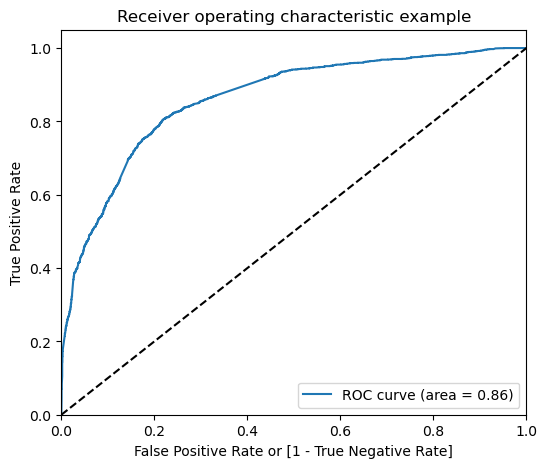

In [87]:
# Now pass the values in the ROC function parameter

create_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Here we observe that the AUC of the ROC is 0.86 which is quite good. So it indicates that we have a good model. Let us also check the sensitivity and specificity tradeoff to find the the optimal cutoff point.

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value
and the below section deals with that. Optimal cutoff probability is that prob where we get balanced
sensitivity and specificity

In [88]:
# Now Let us create columns with different probability cutoffs 

num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1


In [89]:
# Let us create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probability cutoffs

# Create a DataFrame to store evaluation metrics for different probability thresholds
threshold_metrics_df = pd.DataFrame(columns=['prob_threshold', 'accuracy', 'sensitivity', 'specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

# Define a list of probability thresholds
thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    # Calculate confusion matrix for each threshold
    confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[threshold])
    
    # Calculate various evaluation metrics
    total = sum(sum(confusion))
    accuracy = (confusion[0, 0] + confusion[1, 1]) / total
    specificity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])
    sensitivity = confusion[1, 1] / (confusion[1, 0] + confusion[1, 1])
    
    # Store metrics in the DataFrame
    threshold_metrics_df.loc[threshold] = [threshold, accuracy, sensitivity, specificity]

print(threshold_metrics_df)

     prob_threshold  accuracy  sensitivity  specificity
0.0             0.0  0.481731     1.000000     0.000000
0.1             0.1  0.527012     0.994416     0.092561
0.2             0.2  0.698274     0.944160     0.469723
0.3             0.3  0.767541     0.865984     0.676038
0.4             0.4  0.791975     0.810610     0.774654
0.5             0.5  0.788612     0.739414     0.834343
0.6             0.6  0.757229     0.624011     0.881055
0.7             0.7  0.735037     0.543509     0.913062
0.8             0.8  0.711500     0.453234     0.951557
0.9             0.9  0.644026     0.279665     0.982699


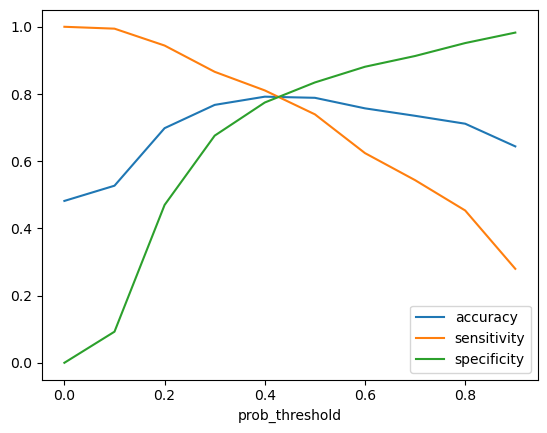

In [90]:
# Now let we will plot the confusion matrix

threshold_metrics_df.plot.line(x='prob_threshold', y=['accuracy','sensitivity','specificity'])
plt.show()

Here we can observe that around 0.42, we get the optimal values of the three metrics. So let us choose 0.42 as our cutoff now.

In [91]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


In [92]:
# Now let us assign lead score to the training data

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0,30
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0,14
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0,13
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0,29
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1,95


In [93]:
# Let us check the overall accuracy.

print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.7908540685944856


In [94]:
# Let us create the confusion matrix once again

confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_2

array([[1823,  489],
       [ 444, 1705]], dtype=int64)

In [95]:
# Let's evaluate the other metrics as well

TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [96]:
# Now check for the sensitivity of our logistic regression model

print("Sensitivity : ",TP / (TP+FN))

Sensitivity :  0.793392275476966


In [97]:
# Calculating the 'specificity'

print("Specificity : ",TN / (TN+FP))

Specificity :  0.7884948096885813


In [98]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted

print("False Positive rate : ",FP / (TN+FP))

False Positive rate :  0.21150519031141868


In [99]:
# Positive predictive value

print("Positive Predictive Value :",TP / (TP+FP))

Positive Predictive Value : 0.7771194165907019


In [100]:
# Negative predictive value

print("Negative Predictive Value : ",TN / (TN+ FN))

Negative Predictive Value :  0.80414644905161


Now the cutoff point seems good to go.

## Precision and Recall

In the context of logistic regression and classification problems, precision and recall are evaluation metrics that help assess the performance of a model, especially in scenarios where class imbalance exists.

Precision:
1. Precision measures the accuracy of the positive predictions made by the classifier.
2. It is the ratio of correctly predicted positive observations (true positives) to the total predicted positive observations (true positives + false positives).
3. Precision focuses on the accuracy of positive predictions among all the predicted positive instances.
4. A high precision score indicates that when the model predicts a positive outcome, it is highly likely to be correct.

Recall (Sensitivity):
1. Recall, also known as sensitivity or true positive rate, measures the model's ability to correctly identify positive instances.
2. It is the ratio of correctly predicted positive observations (true positives) to the total actual positive observations (true positives + false negatives).
3. Recall focuses on how many of the actual positive instances were correctly predicted by the model. A high recall score indicates that the model can effectively capture a larger proportion of actual positive instances.

In [101]:
# Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1929,  383],
       [ 560, 1589]], dtype=int64)

In [102]:
# Precision
# TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.8057809330628803


In [103]:
# Recall
# TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.739413680781759


## Perform Precision and Recall using sklearn

In [104]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.8057809330628803


In [105]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.739413680781759


## Precision and recall tradeoff

In [106]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: predicted, Length: 4461, dtype: int64)

In [107]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

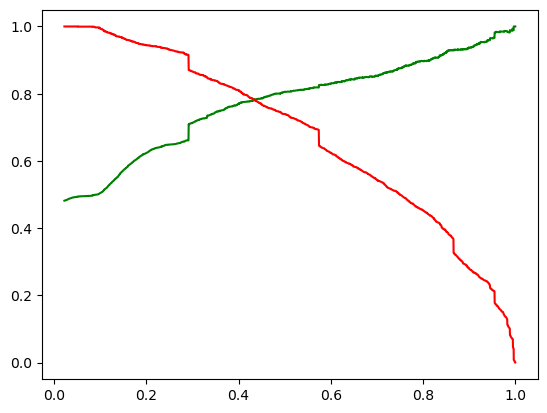

In [108]:
# Now plot a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Here we can see the trade-off between Precision and Recall

## Making Predictions on the Test Set

In [109]:
# Create a list of numeric variables and then apply scaling on the test dataset

X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_testone,Do_Not_Email_Yes,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Interview_Yes,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6122,0.027888,0.029049,0.4375,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9202,0.015936,0.416813,0.2500,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6570,0.011952,0.378961,0.1875,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2668,0.031873,0.395246,0.2500,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [110]:
# Selecting the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead_Origin_Lead Add Form,Lead_Source_Olark Chat,Lead_Source_Reference,Lead_Source_Welingak Website,Do_Not_Email_Yes,Last_Activity_Had a Phone Conversation,Last_Activity_SMS Sent,Occupation_Housewife,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Unreachable
4771,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,0.011952,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0


In [111]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [112]:
# Check X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead_Origin_Lead Add Form,Lead_Source_Olark Chat,Lead_Source_Reference,Lead_Source_Welingak Website,Do_Not_Email_Yes,Last_Activity_Had a Phone Conversation,Last_Activity_SMS Sent,Occupation_Housewife,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,1.0,0.011952,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,0,0,0,0,0,0,1,0,0,1,0,0,0
6583,1.0,0.011952,0.152289,0,0,0,0,0,0,1,0,0,1,0,0,0
5531,1.0,0.055777,0.702025,0,0,0,0,0,0,0,0,0,1,0,0,0
3056,1.0,0.011952,0.417694,0,0,0,0,1,0,1,0,0,1,0,0,0


In [113]:
# Now drop the columns that were dropped during the logistic regression model building on train set

columns_to_drop = ['Lead_Source_Reference', 'Occupation_Housewife', 'Occupation_Working Professional', 
                     'Last_Notable_Activity_Had a Phone Conversation']
X_test.drop(columns_to_drop, axis=1, inplace=True)

In [114]:
# Now check for changes

X_test.head()

,TotalVisits,Total Time Spent on Website,Lead_Origin_Lead Add Form,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Do_Not_Email_Yes,Last_Activity_Had a Phone Conversation,Last_Activity_SMS Sent,Occupation_Student,Occupation_Unemployed,Last_Notable_Activity_Unreachable
4771,0.000000,0.000000,1,0,0,0,0,1,0,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,1,0
9202,0.015936,0.416813,0,0,0,0,0,1,0,1,0
6570,0.011952,0.378961,0,0,0,1,0,1,0,1,0
2668,0.031873,0.395246,0,0,0,0,0,1,0,1,0


In [115]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = logreg_5.predict(sm.add_constant(X_test))

In [116]:
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [117]:
# Now convert the predicted results (y_test_pred) to a dataframe

y_pred_df = pd.DataFrame(y_test_pred)

In [118]:
# Check the head

y_pred_df.head()

,0
4771,0.996296
6122,0.129992
9202,0.703937
6570,0.299564
2668,0.720796


In [119]:
# Now convert y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [120]:
# Remove index for both dataframes to append them side by side 

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [121]:
# Now append y_test_df and y_pred_df

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [122]:
# Check the head of 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [123]:
# Now we can rename the 0 column to "Converted_Prob"

y_pred_final= y_pred_final.rename(columns = {0 : 'Converted_Prob'})

# Check for changes

y_pred_final.head()

,Converted,Converted_Prob
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [124]:
# Let us make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)


# Check for changes

y_pred_final.head()

,Converted,Converted_Prob,final_predicted
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


In [125]:
# Let us check the overall accuracy.

print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.7845188284518828


In [126]:
# Let us create the confusion matrix once again

confusion_3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_3

array([[786, 210],
       [202, 714]], dtype=int64)

In [127]:
# Let's evaluate the other metrics as well

TP = confusion_3[1,1] # true positive 
TN = confusion_3[0,0] # true negatives
FP = confusion_3[0,1] # false positives
FN = confusion_3[1,0] # false negatives

In [128]:
# Now check for the sensitivity of our predicted model

print("Sensitivity : ",TP / (TP+FN))

Sensitivity :  0.7794759825327511


In [129]:
# Calculating the 'specificity'

print("Specificity : ",TN / (TN+FP))

Specificity :  0.7891566265060241


## Assigning Lead Score to the Testing data

In [130]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Converted,Converted_Prob,final_predicted,Lead_Score
0,1,0.996296,1,100
1,0,0.129992,0,13
2,0,0.703937,1,70
3,1,0.299564,0,30
4,1,0.720796,1,72


## Observations

After running the model on the Test Data , we obtain:
* Accuracy : 78.4 %
* Sensitivity : 77.9 %
* Specificity : 78.9 %

## Comparison between train and test data

Train Data:
* Accuracy : 79.0 %
* Sensitivity : 79.3 %
* Specificity : 78.8 %
    
Test Data:
* Accuracy : 78.4 %
* Sensitivity : 77.9 %
* Specificity : 78.9 %

Thus we have achieved our goal of the target lead conversion rate to be around
79% which near to 80%. The Model seems to predict the Conversion Rate very well and we should be able to give the
CEO confidence in making good calls based on this model to get a higher lead conversion rate of 79%.

In [131]:
# Now let us find out the leads which should be contacted
# The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85.
# They can be termed as "Hot Leads".

hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Converted,Converted_Prob,final_predicted,Lead_Score
0,1,0.996296,1,100
10,1,0.987981,1,99
14,1,0.876810,1,88
17,1,0.935454,1,94
20,1,0.979392,1,98
...,...,...,...,...
1882,1,0.996296,1,100
1889,1,0.875543,1,88
1904,1,0.920263,1,92
1905,1,0.973954,1,97


So there are 392 leads which can be contacted and have a high chance of getting converted.